<a href="https://colab.research.google.com/github/iqbalamo93/Clustering/blob/master/DietHabbitsUK_Kmeas_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
Url = 'https://raw.githubusercontent.com/iqbalamo93/Datasets/master/UK_foods.csv'
df_UK = pd.read_csv(Url,index_col='Unnamed: 0')
df=df_UK.transpose()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from sklearn.preprocessing import  MinMaxScaler
scaler = MinMaxScaler()
df = scaler.fit_transform(df.values)

In [4]:
from sklearn.cluster import KMeans

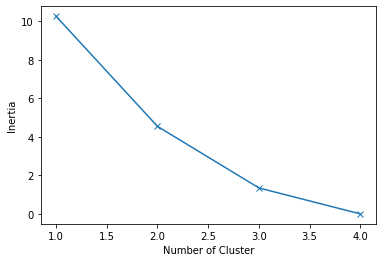

In [5]:
#Cheacking for ideal Cluster size
inertia  = []
for x in range(1,5):
  model =  KMeans(n_clusters=x, random_state=1)
  model.fit(df)
  inertia.append(model.inertia_)
plt.plot(range(1,5),inertia,marker='x')
plt.xlabel('Number of Cluster')
plt.ylabel('Inertia')
plt.show()

In [12]:
kmeans_model = KMeans(n_clusters=2)
distinct = kmeans_model.fit_transform(df)

In [13]:
labels = kmeans_model.labels_

In [14]:
labels

array([0, 0, 0, 1], dtype=int32)

In [15]:
kmeans_model

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [16]:
results = pd.DataFrame(data=distinct,
                       index=df_UK.transpose().index,
                       columns=['C1','C2'])

results = results.reset_index()

In [19]:
results


,index,C1,C2
0,England,0.729865,2.639948
1,Wales,1.459843,3.697924
2,Scotland,1.371109,2.600871
3,N.Ireland,2.760719,0.000000


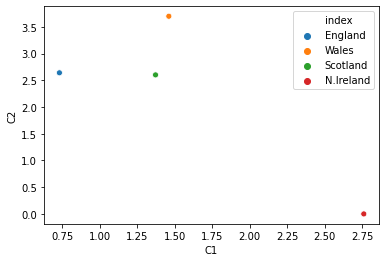

In [17]:
sns.scatterplot(x='C1',y='C2', data=results, hue='index' )

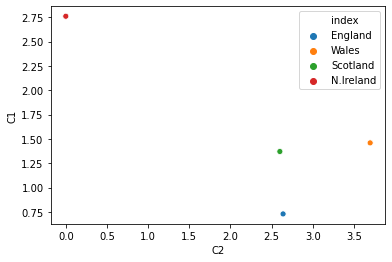

In [20]:
sns.scatterplot(x='C2',y='C1', data=results, hue='index' )

Considering C2 we can see N.Ireland and Wales to be distinct group

In [21]:
from sklearn.decomposition import PCA

In [30]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(df)

([<matplotlib.axis.XTick at 0x7ff1d2cb2eb8>],
 <a list of 1 Text major ticklabel objects>)

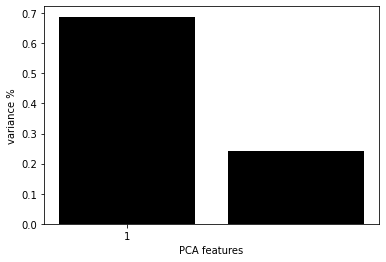

In [33]:
plt.bar(range(1,3), pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)

In [34]:
principalComponents

array([[-0.42432646,  0.12784027],
       [-1.74739108, -0.65671622],
       [ 0.2283678 ,  1.23679728],
       [ 1.94334973, -0.70792133]])

In [36]:
PCA_components = pd.DataFrame(principalComponents)

In [45]:
PCA_components

,0,1
0,-0.424326,0.127840
1,-1.747391,-0.656716
2,0.228368,1.236797
3,1.943350,-0.707921


In [46]:
 PCA = pd.DataFrame(data=principalComponents,
                       index=df_UK.transpose().index,
                       columns=['C1','C2'])
 PCA = PCA.reset_index()

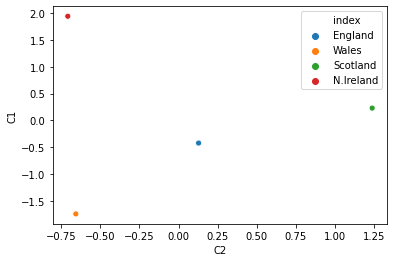

In [49]:
sns.scatterplot(x='C2',y='C1', data=PCA, hue='index' )

PCA: On C2 we can see N.Ireland and Wales Clubes